# Linear regime for decay, tau_z and training time
This notebook is to study how the decay with extension looks like for different values of tau_z and trainig times. The hope is to find whether the regime is linear

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = 'f0776528cd6b71e69c1ba1dee6d93830f570a45f'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import Protocol, BCPNNFast, NetworkManager

## Tau_z

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 30

dt = 0.001

# Timings parameters
tau_z_pre = 0.150
tau_p = 10.0

# Traiming parameters
training_times = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

n = 5
T_cue = 0.100
T_recall = 10.0

patterns_indexes = [i for i in range(n_patterns)]

tau_z_pre_vector = np.arange(0.100, 1.550, 0.050)

columns = []

In [5]:
for tau_z_pre in tau_z_pre_vector:
    print(tau_z_pre)
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns, tau_z_pre=tau_z_pre)
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    simple_protocol = Protocol()
    simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_times,
                                    inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    manager.run_network_protocol(simple_protocol, verbose=False)
    w_small = manager.nn.w[:minicolumns, :minicolumns]
    column = w_small[:, 0]

    column = column[column > 0]
    columns.append(column)

0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1.0
1.05
1.1
1.15
1.2
1.25
1.3
1.35
1.4
1.45
1.5


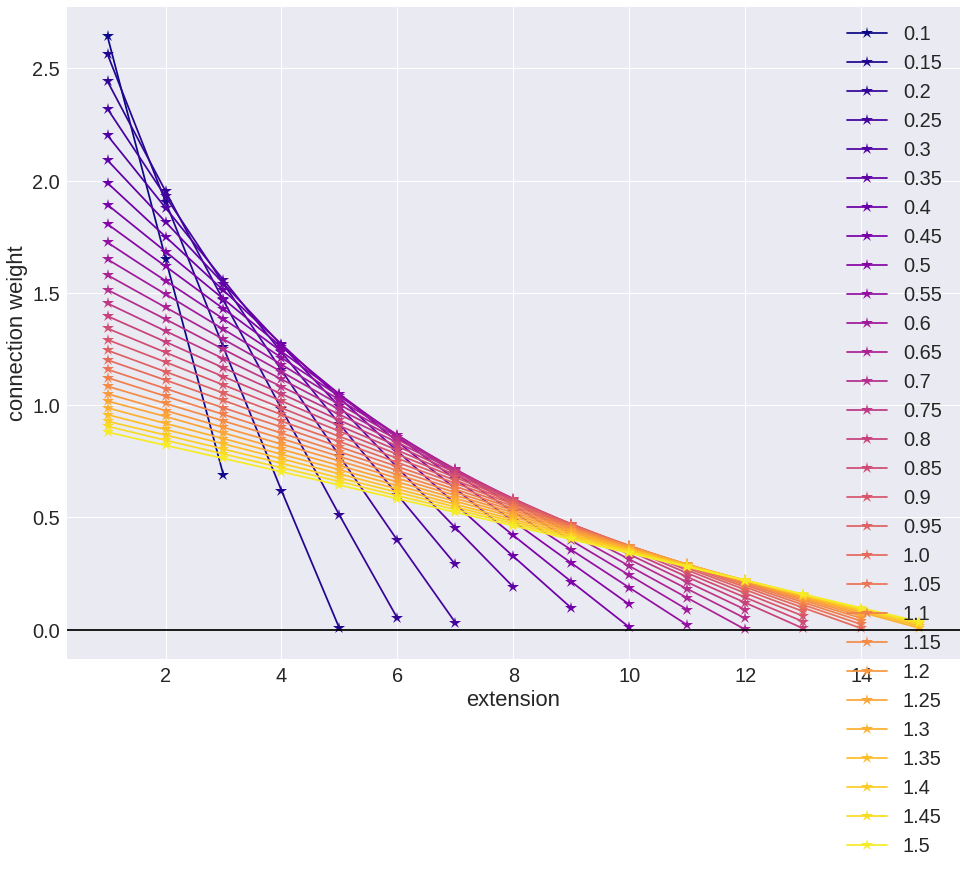

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

norm = matplotlib.colors.Normalize(vmin=0, vmax=len(columns))
cmap = matplotlib.cm.plasma

for column_number, column in enumerate(columns):

    x = np.arange(1, len(column) + 1, 1)
    label = str(tau_z_pre_vector[column_number])
    ax.plot(x, column, '*-', markersize=13, color=cmap(norm(column_number)), label=label)


ax.axhline(0, color='black')
ax.set_xlabel('extension')
ax.set_ylabel('connection weight')
ax.legend();

## Training time

In [11]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 30

dt = 0.001

# Timings parameters
tau_z_pre = 0.150
tau_p = 10.0

# Traiming parameters
training_times = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

n = 5
T_cue = 0.100
T_recall = 10.0

patterns_indexes = [i for i in range(n_patterns)]

training_times_vector = np.arange(0.050, 1.050, 0.050)

columns = []

In [12]:
for training_times in training_times_vector:
    print(training_times)
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns, tau_z_pre=tau_z_pre)
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    simple_protocol = Protocol()
    simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_times,
                                    inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    manager.run_network_protocol(simple_protocol, verbose=False)
    w_small = manager.nn.w[:minicolumns, :minicolumns]
    column = w_small[:, 0]

    column = column[column > 0]
    columns.append(column)

0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1.0


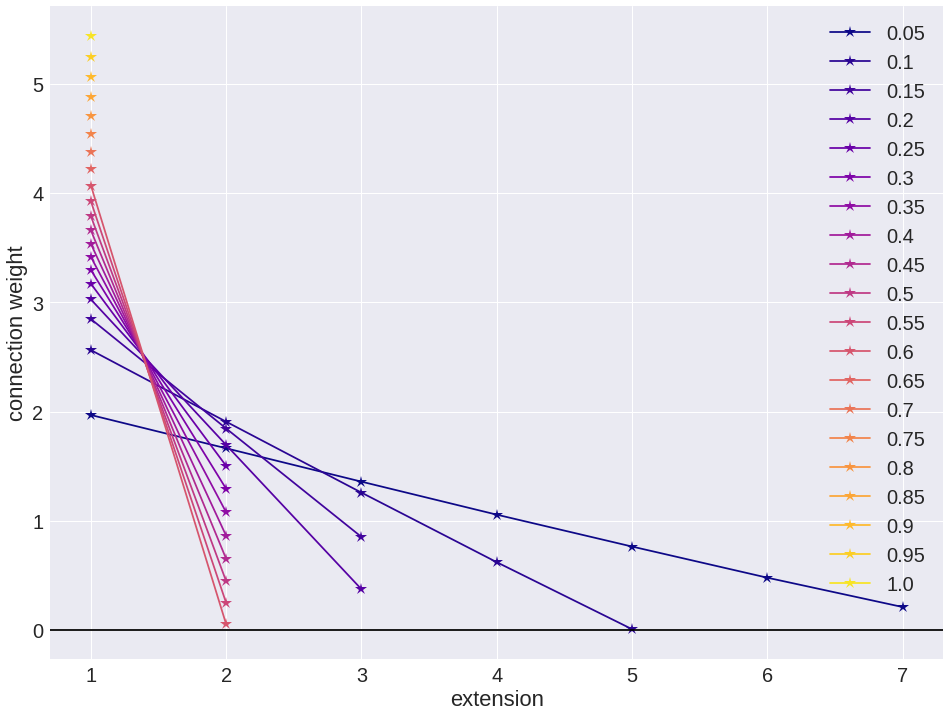

In [13]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

norm = matplotlib.colors.Normalize(vmin=0, vmax=len(columns))
cmap = matplotlib.cm.plasma

for column_number, column in enumerate(columns):

    x = np.arange(1, len(column) + 1, 1)
    label = str(training_times_vector[column_number])
    ax.plot(x, column, '*-', markersize=13, color=cmap(norm(column_number)), label=label)


ax.axhline(0, color='black')
ax.set_xlabel('extension')
ax.set_ylabel('connection weight')
ax.legend()

#### Git machinery

In [10]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])